## Pset 1

### Problem 1

I confirm that I read the syllabus and am fully aware of key dates, deadlines, and rules.

### Problem 2

In [162]:
import sys
import subprocess
import matplotlib.pyplot as plt

# Install matplotlib silently
subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
import pandas
# Read all of the files
real_gdp = pandas.DataFrame(pandas.read_csv('GDPC1.csv'))
nominal_gdp = pandas.DataFrame(pandas.read_csv('GDP.csv'))
federal_debt = pandas.DataFrame(pandas.read_csv('GFDEBTN.csv'))
interest_payments_federal_debt = pandas.DataFrame(pandas.read_csv('A091RC1Q027SBEA.csv'))
gdi = pandas.DataFrame(pandas.read_csv('GDI.csv'))
government_expenditures = pandas.DataFrame(pandas.read_csv('GCE.csv'))
for x in [real_gdp, nominal_gdp, federal_debt, interest_payments_federal_debt, government_expenditures, gdi] :
    x['observation_date'] = pandas.to_datetime(x['observation_date'])

#### Part 1

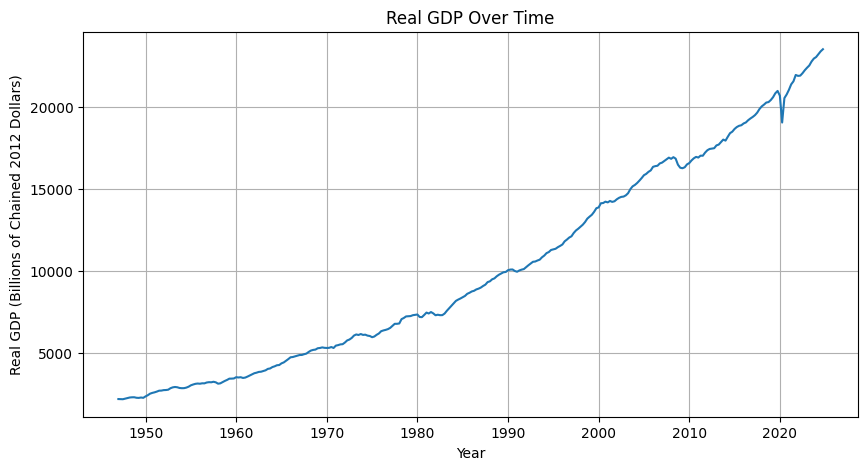

In [101]:
real_gdp['observation_date'] = pandas.to_datetime(real_gdp['observation_date'])
plt.figure(figsize=(10, 5))
plt.plot(real_gdp['observation_date'], real_gdp['GDPC1'])
plt.xlabel('Year')
plt.ylabel('Real GDP (Billions of Chained 2012 Dollars)')
plt.title('Real GDP Over Time')
plt.grid(True)
plt.show()

In [110]:
for i in range(len(real_gdp)) :
    # print(real_gdp["observation_date"][i])
    if real_gdp["observation_date"][i] == pandas.Timestamp("2019-10-01") :
        print("Real GDP in 2019, quarter 4 is", real_gdp["GDPC1"][i])
    elif real_gdp["observation_date"][i] == pandas.Timestamp("2020-04-01") :
        print("Real GDP in 2020, quarter 2 is", real_gdp["GDPC1"][i])

Real GDP in 2019, quarter 4 is 20985.448
Real GDP in 2020, quarter 2 is 19056.617


The 2019 quarter 4 levels of real GDP is 20985.448, and the 2020 quarter 2 levels of real GDP are 19056.617.

#### Part 2

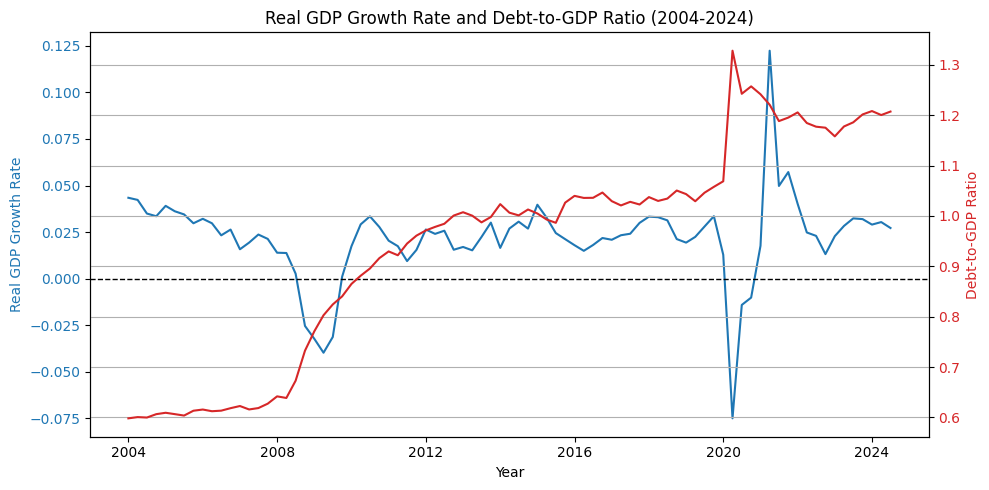

In [151]:
df = nominal_gdp.merge(real_gdp, on="observation_date")
df = df.merge(federal_debt, on="observation_date")
df.head(10)
df["ratio of debt: GDP"] = df["GFDEBTN"] / df["GDP"] * 1/1000
df["real_gdp_growth"] = (df["GDPC1"] - df["GDPC1"].shift(4)) / df["GDPC1"].shift(4) 
df = df[(df["observation_date"] >= "2004-01-01") & (df["observation_date"] <= "2024-12-31")]
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_xlabel("Year")
ax1.set_ylabel("Real GDP Growth Rate", color="tab:blue")
ax1.plot(df["observation_date"], df["real_gdp_growth"], color="tab:blue", label="Real GDP Growth Rate")
ax1.tick_params(axis="y", labelcolor="tab:blue")
ax1.axhline(y=0, color="black", linestyle="--", linewidth=1)

# Create second y-axis
ax2 = ax1.twinx()
ax2.set_ylabel("Debt-to-GDP Ratio", color="tab:red")
ax2.plot(df["observation_date"], df["ratio of debt: GDP"], color="tab:red", label="Debt-to-GDP Ratio")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Title and grid
plt.title("Real GDP Growth Rate and Debt-to-GDP Ratio (2004-2024)")
fig.tight_layout()
plt.grid(True)
plt.show()

In [171]:
row = df[df['observation_date'] == '2020-04-01']
print(row['GDP_GDI_Ratio'])

293    1.007352
Name: GDP_GDI_Ratio, dtype: float64


The ratio of government debt to GDP in 2020 Q2 is 1.007352.

2007-2009 (Great Recession):
- GDP Growth: The U.S. experienced a severe contraction during the 2007-2009 Great Recession. GDP dropped sharply due to the collapse of the housing market, financial crisis, and declining consumer/business activity.
- Government Debt to GDP Ratio: As GDP fell, the government debt-to-GDP ratio increased significantly. The U.S. government increased borrowing to finance fiscal stimulus programs (like the TARP and the American Recovery and Reinvestment Act), which caused the national debt to rise faster than GDP.
- Overall, the ratio rose during the recession because GDP shrank while government spending and borrowing grew to support economic recovery.

2020 (COVID-19 Recession):
- GDP Growth: The U.S. economy contracted sharply in Q2 2020 due to the COVID-19 pandemic, resulting in a massive decline in GDP.
- Government Debt to GDP Ratio: The government responded with unprecedented fiscal stimulus (such as the CARES Act, expanded unemployment benefits, direct payments to individuals) to support households, businesses, and the healthcare system. While GDP plummeted, government debt surged to finance these programs.
- Overall, similar to the 2007-2009 period, the ratio rose dramatically due to the combination of sharp GDP contraction and massive government spending.

#### Part 3

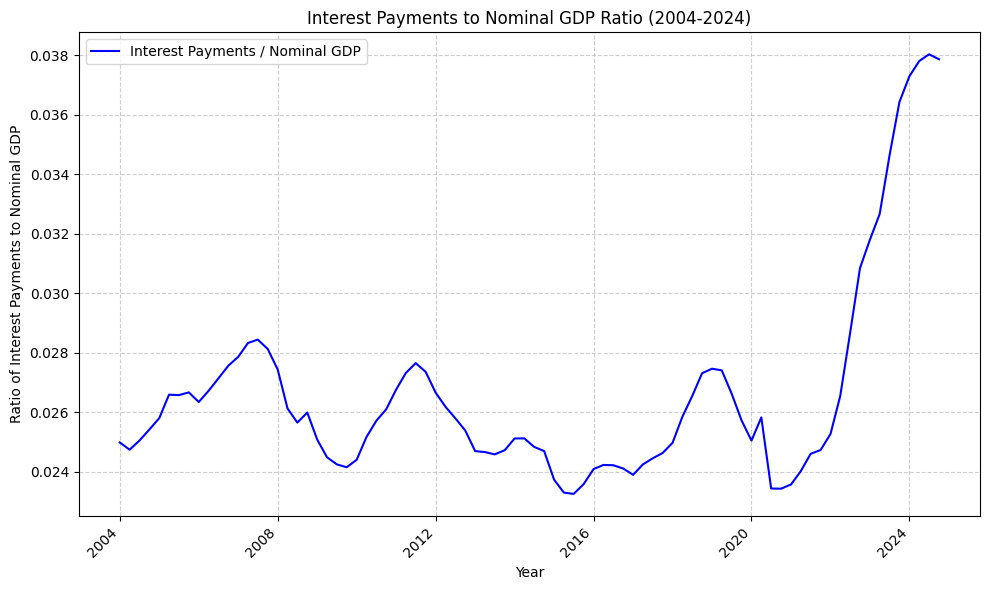

In [154]:
df = nominal_gdp.merge(interest_payments_federal_debt, on="observation_date")
df = df[(df['observation_date'] >= '2004-01-01') & (df['observation_date'] <= '2024-12-31')]

# Compute the ratio of interest payments to nominal GDP
df['Ratio'] = df['A091RC1Q027SBEA'] / df['GDP']

# Plot the ratio over time
plt.figure(figsize=(10, 6))
plt.plot(df['observation_date'], df['Ratio'], label="Interest Payments / Nominal GDP", color='blue')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Ratio of Interest Payments to Nominal GDP')
plt.title('Interest Payments to Nominal GDP Ratio (2004-2024)')
plt.legend()

# Improve x-axis readability
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()

The ratio of interest payments on federal debt to nominal GDP has been rising sharply in the 2022-2024 period compared to the 2004-2021 period due to rising interest rate (the Federal Reserve has aggressively raised rates since 2022 to combat inflation); higher federal debt (the U.S. national debt has continued growing, leading to larger interest obligations); and slower GDP growth (the rapid rise in interest payments has outpaced GDP growth).

#### Part 4

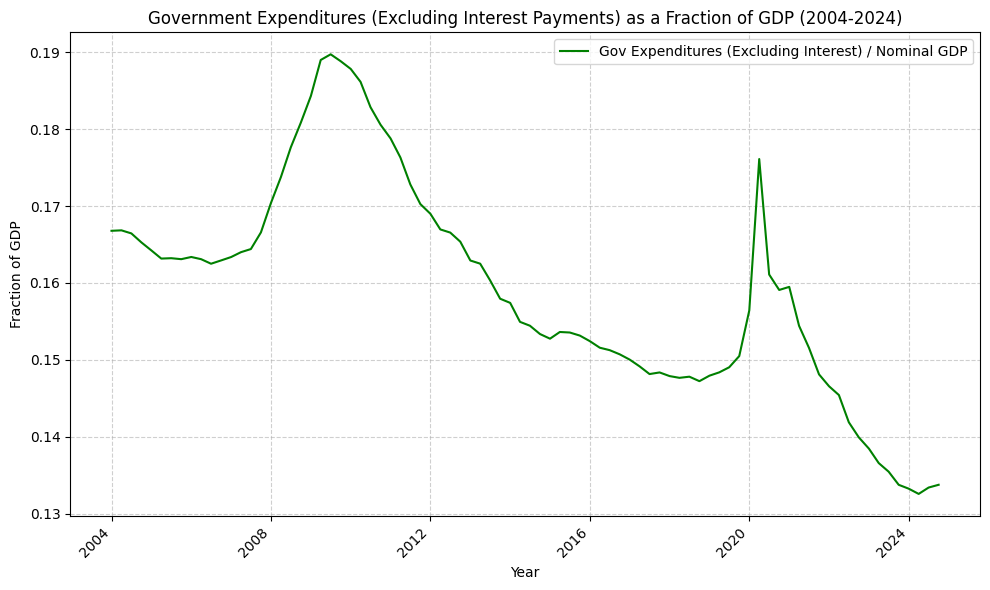

In [160]:
df = nominal_gdp.merge(interest_payments_federal_debt, on="observation_date").merge(government_expenditures, on="observation_date")

# Rename columns (assuming column names based on dataset)
df = df[(df['observation_date'] >= '2004-01-01') & (df['observation_date'] <= '2024-12-31')]

# Compute the fraction of GDP spent on government expenditures (excluding interest payments)
df['Fraction'] = (df['GCE'] - df['A091RC1Q027SBEA']) / df['GDP']

# Plot the fraction over time
plt.figure(figsize=(10, 6))
plt.plot(df['observation_date'], df['Fraction'], label="Gov Expenditures (Excluding Interest) / Nominal GDP", color='green')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Fraction of GDP')
plt.title('Government Expenditures (Excluding Interest Payments) as a Fraction of GDP (2004-2024)')
plt.legend()

# Improve x-axis readability
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()

During both the 2007-2009 Great Recession and the 2020 COVID-19 recession, the fraction of GDP spent on government expenditures (excluding interest payments on federal debt) increased significantly. 

In 2007-2009: the financial crisis led to a sharp decline in GDP due to falling consumer spending and business investment. In response, the U.S. government's massive fiscal stimulus (e.g., the 2009 American Recovery and Reinvestment Act) led to increased spending (all the while GDP declined), causing the fraction to rise.

In 2020: The COVID-19 pandemic caused an unprecedented economic shutdown, leading to a sharp GDP contraction in Q2 2020. The government responded with record-breaking stimulus spending (e.g., CARES Act, expanded unemployment benefits, stimulus checks). This pushed the fraction to a very high level.

#### Part 5

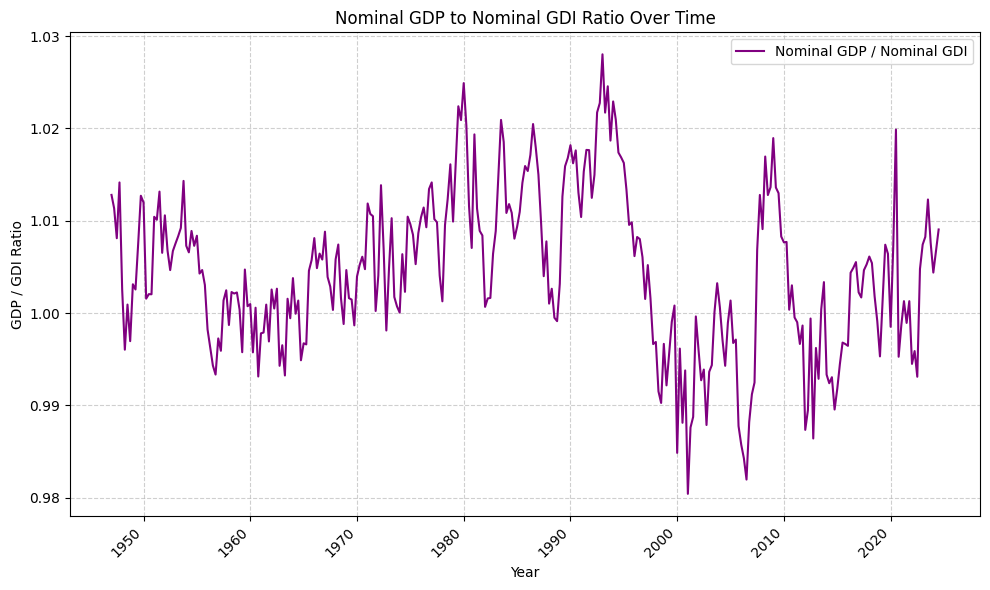

In [163]:
df = nominal_gdp.merge(gdi, on="observation_date")
df['GDP_GDI_Ratio'] = df['GDP'] / df['GDI']
plt.figure(figsize=(10, 6))
plt.plot(df['observation_date'], df['GDP_GDI_Ratio'], label="Nominal GDP / Nominal GDI", color='purple')

# Labels and title
plt.xlabel('Year')
plt.ylabel('GDP / GDI Ratio')
plt.title('Nominal GDP to Nominal GDI Ratio Over Time')
plt.legend()

# Improve x-axis readability
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()

Since every dollar spent (GDP) is income for someone else (GDI), they should theoretically be equal. The data demonstrates that the GDI is indeed approximately equal to the GDP, but in reality, GDP and GDI often differ slightly due to:

- **Statistical Discrepancies** – Data collection methods differ, and some components (like corporate profits) are harder to measure.
- **Revisions & Estimations** – Initial estimates are revised as better data becomes available.
- **Underground Economy** – Some income (e.g., unreported cash transactions) is not captured in official statistics.
- **Imputed Values** – Some economic activities (e.g., owner-occupied housing) are estimated rather than directly measured.

### Problem 3

#### Part 1

The final goods in this economy are instant noodles ($600$ dollars) and the portion of wheat sold as a final good. The wheat company's total revnue is $250$ dollars, but some of that revenue is sold to the noodle company as an intermediate good (100 dollars). Thus, the wheat is sold as a final good at $250 - 100 = 150$ dollars.

The GDP is the value of the final goods ($150$ dollars for wheat and $600$ dollars for instant noodles), which amounts to $750$ dollars.

#### Part 2

The wheat company has a revenue of $250$ dollars, and since no intermediate goods are used, it has $250$ dollars in added value. As for the instant noodle company, it has a revenue of $600$ dollars and $100$ dollars worth of intermediate good purchases (wheat). So, its value added is $600 - 100 = 500$ dollars. The total value added is $250$ dollars (wheat) plus $500$ dollars (instant) noodles, which amounts to $750$ dollars.

#### Part 3

The wheat company has $90$ dollars in wages and $160$ dollars in profit; the instant noodle company has $60$ dollars in wages and 440 dollars in profit. Thus, the total income is $90$ + $160$ + $60$ + $440$ = $750$ dollars.

### Problem 4

#### Part 1

- $c_0$ represents autonomous consumption, which is the level of consumption that occurs even if the disposable income ($Y_d$) is zero. It captures factors like basic survival consumption and consumer confidence.

- $c_1$ is the marginal propensity to consume (MPC), which measures how much consumption increases for each additional unit of disposable income. Since $0 < c_1 < 1$, it means that consumers spend a fraction of each dollar they earn.

#### Part 2

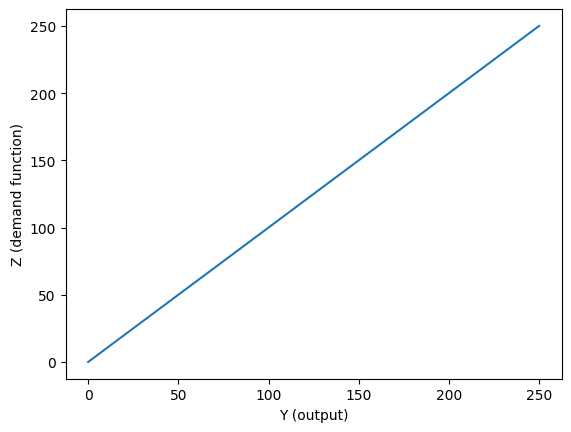

In [96]:
import sys
import subprocess

# Install matplotlib silently
subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0, 250])
ypoints = np.array([0, 250])

plt.xlabel("Y (output)")
plt.ylabel("Z (demand function)")

plt.plot(xpoints, ypoints)
plt.show()

#### Part 3

The goods market equilibrium is given by
$$Y = Z = C + I + G.$$
Substituting $C = c_0 + c_1 Y_D$ and $Y_D = Y - T$:
$$Y = (c_0 + c_1(Y-T)) + I + G$$
and expanding,
$$Y = c_0 + c_1 Y - c_1 T _ I + G.$$
Rearranging,
$$Y - c_1Y = c_0 + I + G - c_1 T \Longrightarrow Y(1 - c_1) = c_0 + I + G - c_1 T \Longrightarrow Y = \frac{c_0 + I + G - c_1T}{1 - c_1}.$$

#### Part 4

The multiplier is $$\frac{1}{1 - c_1}.$$
This tells us that an increase in autonomous spending (such as $c_0$) increases the equilibrium output by a factor of $\frac{1}{1 - c_1}$. The larger $c_1$ (MPC), the stronger the effect.

#### Part 5

Private saving is defined as
$$S = Y - T - C.$$
Substituting $C = c_0 + c_1 Y_D$ and $Y_d = Y - T$:
$$S = Y - T - (c_0 + c_1(Y - T)).$$
Expanding:
$$S = Y - T - c_0 - c_1 Y + c_1 T = (1 - c_1)Y - (1 - c_1)T - c_0.$$
Using the equilibrium, $Y = \frac{c_0 + I + G - c_1 T}{1 - c_1}$, we can rewrite $S$ in terms of $I$, $T$, $G$:
$$S = (1 - c_1) \cdot \frac{c_0 + I + G - c_1 T}{1 - c_1} - (1 - c_1)T - c_0 = c_0 + I + G - c_1T - (1 - c_1)T - c_0 =I + G - T.$$
Thus, the final expression is 
$$S= I + G - T.$$

#### Part 6

If $G = T + B$ and $B = 0$, then $G = T$. The equilibrium simplifies to 
$$S = I.$$
This means that in a balanced budget scenario (no government spending), private savings must exactly equal investment.

#### Part 7

From the expression for $S$:
$$S = (1 - c_1)Y - (1 - c_1)T - c_0 = -c_0 + (1 - c_1)Y_D.$$
So,
$$s_0 = -c_0, s_1 = 1 - c_1.$$
$s_0$ represents the level of saving when disposable income is zero (opposite of autonomous consumption), and $s_1 = 1 - c_1$ is the marginal propensity to save (MPS). Since the multiplier is $\frac{1}{1 -c_1}$, this shows that $s_1$ is the inverse of the multiplier in determining how saving adjust to income prices.